In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

In [385]:
def curve(x, noise=False):
    rand_sig = np.random.RandomState(1)
    rand_noise = np.random.RandomState(0)
    if noise == False:
        return np.sin(2*x*np.pi)
    else:
        return 0.2*np.sign(0.5-rand_sig.rand(x.shape[0]))*rand_noise.rand(x.shape[0]) + np.sin(2*x*np.pi)

def polynom(x, degree=2):
    poly_trans = PolynomialFeatures(degree=degree)
    return poly_trans.fit_transform(np.array(x).reshape(-1, 1))     

def f(x, W, degree=2):
    poly_coef = polynom(x, degree=degree).T
    return np.dot(W.transpose(), poly_coef), poly_coef

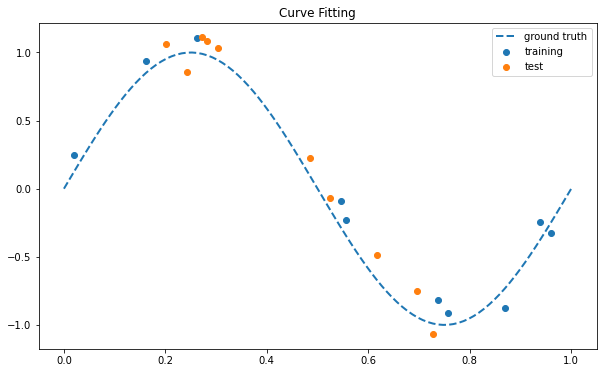

In [386]:
x = np.linspace(0, 1, 100)
y = curve(x)
size_train = 10
rng = np.random.RandomState(0)
'''
x_train = rng.choice(x, size=size_train, replace=False)
y_train = curve(x_train, noise=True)
'''


values_tmp = rng.choice(x, size=80, replace=False)
x_train = values_tmp[0:size_train]
x_test = np.sort(rng.choice(values_tmp[size_train:], size=10, replace=False))
y_train = curve(x_train, noise=True)
y_test = curve(x_test, noise=True)



figsize=[10,6]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="training")
ax.scatter(x_test, y_test, label="test")
ax.set_title('Curve Fitting')
ax.legend()

In [428]:
degree=2
N = x_train.shape[0]
Y = y_train.reshape(1, -1)

W = np.random.rand(degree + 1, 1)
Y_pred, coeff = f(x_train, W, degree=degree)

X = coeff
N, Y.shape, Y_pred.shape, W.shape, coeff.shape

(10, (1, 10), (1, 10), (3, 1), (3, 10))

In [429]:
## loss function
loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
loss

array([[1.91855598]])

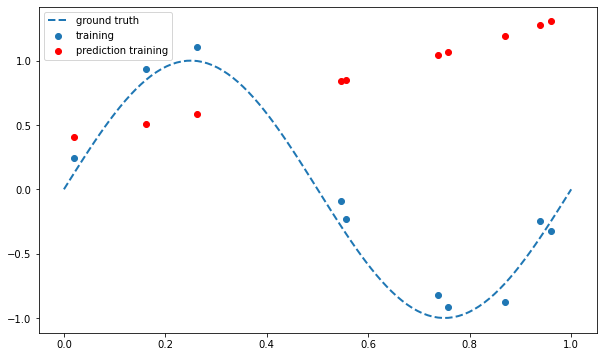

In [430]:
fig, ax = plt.subplots(figsize=figsize)
# ax.set_prop_cycle(
#     color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
#     color=[None, "red"]
# )
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="training")
ax.scatter(x_train, Y_pred, label="prediction training", color='red')
ax.legend()

In [431]:
## derivate
derivate_loss = np.dot(2*(Y-Y_pred), X.transpose())
derivate_loss.shape

(1, 3)

In [432]:
## closed form solution
W_p = np.dot(np.dot(Y, X.transpose()), np.linalg.inv(np.dot(X, X.transpose())))
W_p = W_p.transpose()
W_p.shape

(3, 1)

In [433]:
Y_pred, _ = f(x_train, W_p, degree=degree)
loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
loss

array([[0.1861235]])

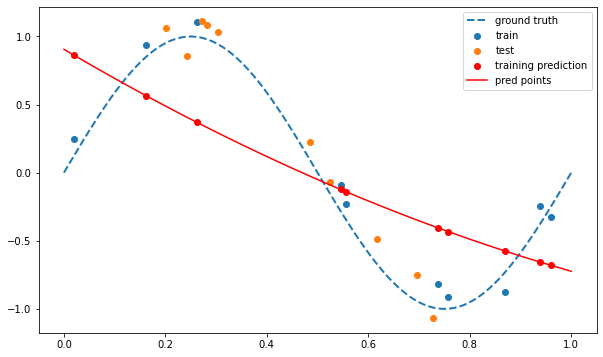

In [434]:
Y_pred_curve, _ = f(x, W_p, degree=degree)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="train")
ax.scatter(x_test, y_test, label="test")
ax.scatter(x_train, Y_pred, label="training prediction", color='red')
ax.plot(x, Y_pred_curve.reshape(-1),label="pred points", color='red')
ax.legend()

In [435]:
W_p_original = W_p.copy()

W_p_original

array([[ 0.90612054],
       [-2.19432621],
       [ 0.56474248]])

## Gradient descent

In [395]:
import pandas as pd

In [436]:
W_p = W_p_original.copy()
W_p

array([[ 0.90612054],
       [-2.19432621],
       [ 0.56474248]])

In [437]:
index_param = [0,1]
W_p = W_p_original.copy()

list_values_loss = []
list_param = []

for i in range(100):
    if i == 0:
        fitted_value = W_p[index_param].copy()
#         print('i==0', W_p)
    elif i%50 == 0:
        W_p[index_param] = fitted_value
#         print('median', W_p)
    else:
        W_p[index_param] = 10*np.sign(0.5-np.random.rand(1))*np.random.rand(len(index_param)).reshape(-1,1) + fitted_value
#         print('otherwise', W_p)
#     W_p = np.random.rand(degree + 1, 1)
    
    Y_pred, _ = f(x_train, W_p, degree=degree)
    loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
    
    list_values_loss.append([loss])
    list_param.append(W_p.copy())
    

In [438]:
x_param = np.hstack(list_param).T
y_loss = np.array(list_values_loss).reshape(-1,1)

x_true = np.array([x_param[50, index_param[0]]])
y_true = np.array([y_loss[50]])

index_sort_1 = np.argsort(x_param[:, index_param[0]])
index_sort_2 = np.argsort(x_param[:, index_param[1]])

x_plot = x_param[index_sort_1, index_param[0]]
x2_plot = x_param[index_sort_2, index_param[1]]
# y_plot = y_loss[index_sort_1][:, 0]
y_plot = y_loss

# x_param[index_sort, index_param], y_loss[index_sort][:, 0]

print(x_param.shape, y_loss.shape, index_sort.shape)
# print(x_plot.shape, x2_plot.shape)
print(x_true, y_true)

(100, 3) (100, 1) (100,)
[0.90612054] [[0.1861235]]


In [439]:
df_plot = pd.DataFrame(np.hstack([x_param[:,index_param], y_loss]))
df_plot

,0,1,2
0,0.906121,-2.194326,0.186124
1,-7.965768,-7.190199,141.307599
2,0.589830,-6.444901,9.756330
3,-7.233500,-3.955823,84.452898
4,5.731746,1.944740,54.173399
...,...,...,...
95,-4.586223,-9.961198,106.309756
96,-7.914416,-7.015371,137.558490
97,-8.666234,-9.753135,200.874937
98,-6.984505,-4.923745,90.726523


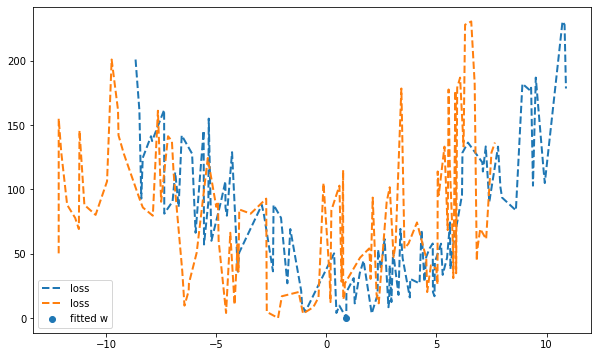

In [440]:
fig, ax = plt.subplots(figsize=figsize)
# ax.plot(x_param[index_sort, index_param], y_loss[index_sort][:, 0], '--', linewidth=2, label="loss")
# ax.plot(x_plot, y_plot, '--', linewidth=2, label="loss")
ax.plot(df_plot.sort_values(0)[0], df_plot.sort_values(0)[2], '--', linewidth=2, label="loss")
ax.plot(df_plot.sort_values(1)[1], df_plot.sort_values(1)[2], '--', linewidth=2, label="loss")

ax.scatter(x_true, y_true, label="fitted w")
# ax.scatter(x_test, y_test, label="test")
# ax.scatter(x_train, Y_pred, label="training prediction", color='red')
# ax.plot(x_param[index_sort, index_param], np.power(x_param[index_sort, index_param], 2), label="x^2")
ax.legend()

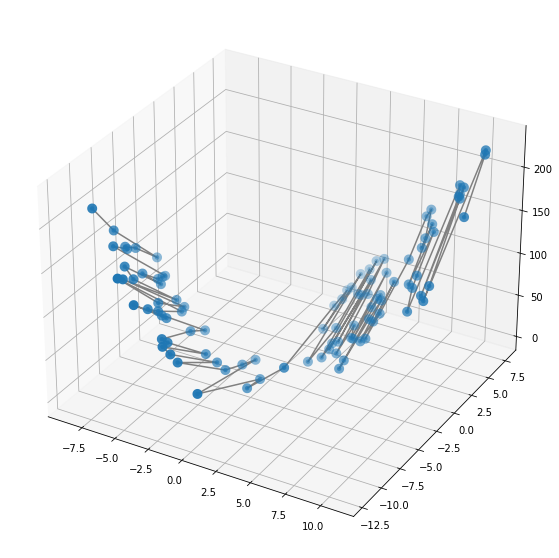

In [441]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'red', 
             linewidth=5.5)
ax.plot3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'gray')

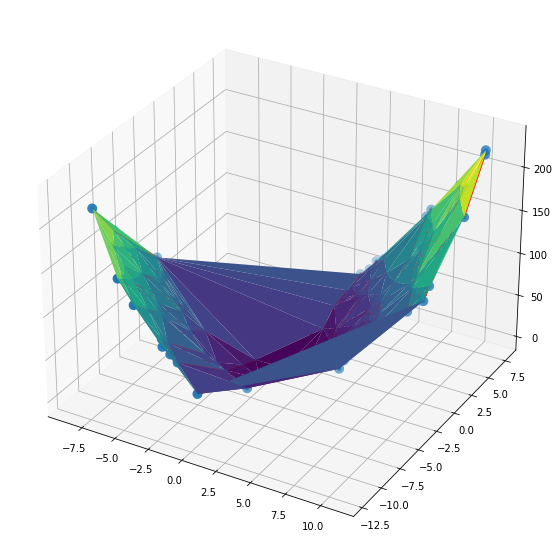

In [442]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'blue', 
             linewidth=5.5)
ax.plot3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'red')
ax.plot_trisurf(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2],
                cmap='viridis', edgecolor='none');

In [443]:
X_mesh, Y_mesh = np.meshgrid(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1])

In [444]:
Z = np.zeros(X_mesh.shape)
for i in range(X_mesh.shape[0]):
    for j in range(Y_mesh.shape[0]):
        W_p[index_param] = np.array([X_mesh[i,j], Y_mesh[i,j]]).reshape(-1,1)
        Y_pred, _ = f(x_train, W_p, degree=degree)
        loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
        Z[i, j] = loss

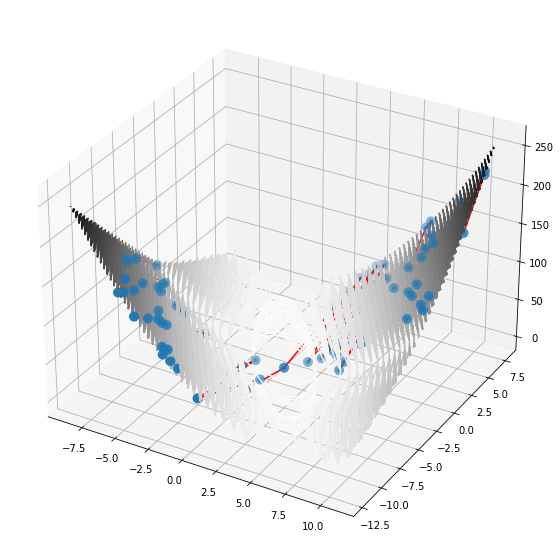

In [445]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'blue', 
             linewidth=5.5)
ax.plot3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'red')
ax.contour3D(X_mesh, Y_mesh, Z, 50, cmap='binary')

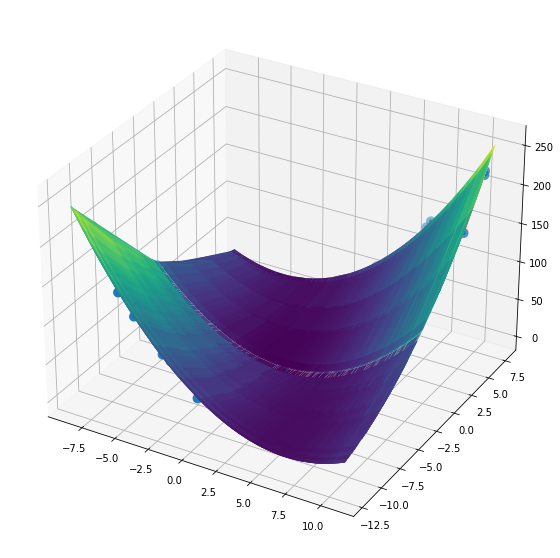

In [446]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'blue', 
             linewidth=5.5)
ax.plot3D(df_plot.sort_values([0,1])[0], df_plot.sort_values([0,1])[1], df_plot.sort_values([0,1])[2], 'red')
ax.plot_surface(X_mesh, Y_mesh, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')